In [2]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
IRIS_FILENAME = 'iris-dataset.csv'

iris_dat = pd.read_csv(IRIS_FILENAME, names=['v1', 'v2', 'v3', 'v4', 'label'], index_col=False)
types = iris_dat['label'].unique()
iris_by_types = {t: iris_dat.loc[iris_dat['label'] == t] for t in types}
iris_d234 = iris_dat.loc[:, ['v2', 'v3', 'v4', 'label']]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

iris_d234_bytypes = {t: iris_d234.loc[iris_d234['label'] == t] for t in iris_d234['label'].unique()}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

dat = iris_d234_bytypes['Iris-setosa']
ax.scatter(dat['v2'], dat['v3'], dat['v4'], label=dat['label'].unique()[0], c='r', marker='o')
dat = iris_d234_bytypes['Iris-versicolor']
ax.scatter(dat['v2'], dat['v3'], dat['v4'], label=dat['label'].unique()[0], c='g', marker='p')
dat = iris_d234_bytypes['Iris-virginica']
ax.scatter(dat['v2'], dat['v3'], dat['v4'], label=dat['label'].unique()[0], c='b', marker='*')

ax.legend()
ax.set_title('Iris-dataset 2, 3, 4 Dimensions')
ax.set_xlabel('v2 Label')
ax.set_ylabel('v3 Label')
ax.set_zlabel('v4 Label')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def draw_iris_d234_sv(ax):
    dat = iris_d234_bytypes['Iris-setosa']
    ax.scatter(dat['v2'], dat['v3'], dat['v4'], label=dat['label'].unique()[0], c='r', marker='o')
    dat = iris_d234_bytypes['Iris-virginica']
    ax.scatter(dat['v2'], dat['v3'], dat['v4'], label=dat['label'].unique()[0], c='b', marker='*')

    ax.legend()
    ax.set_title('Iris-setosa and Iris-virginica in 2, 3, 4 Dimensions')
    ax.set_xlabel('v2 Label')
    ax.set_ylabel('v3 Label')
    ax.set_zlabel('v4 Label')

draw_iris_d234_sv(ax)

In [3]:
from sklearn.svm import LinearSVC
dat = iris_d234_bytypes['Iris-setosa']
dat = dat.append(iris_d234_bytypes['Iris-virginica'], ignore_index=True)
X = dat.loc[:, ['v2', 'v3', 'v4']]
Y = pd.DataFrame(dat['label'])

MAP = {'Iris-setosa': -1, 'Iris-virginica': 1}
for i in range(len(Y)):
    Y.loc[i, 'label'] = MAP[Y.loc[i, 'label']]

clf = LinearSVC(random_state=0)
clf.fit(X, np.array(Y.loc[:, 'label'].T))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [4]:
clf.coef_

array([[-0.49924653,  0.46029353,  0.27161402]])

In [5]:
V2 = np.arange(0, 5, 0.25)
V3 = np.arange(0, 10, 0.25)
V4 = np.arange(0, 3, 0.25)
P = list(zip(V2, V3, V4))
pred = clf.predict(P)
pred

array([-1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1])

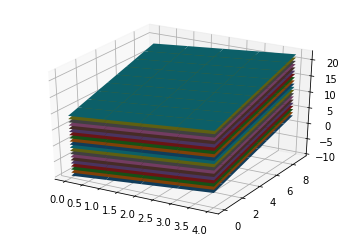

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for b in range(-10, 10):
    V2 = np.arange(0, 5, 1)
    V3 = np.arange(0, 10, 1)
    V2, V3 = np.meshgrid(V2, V3)
    V4 = V2 + V3 + b
    ax.plot_surface(V2, V3, V4)

Text(0.5,0,'v4 Label')

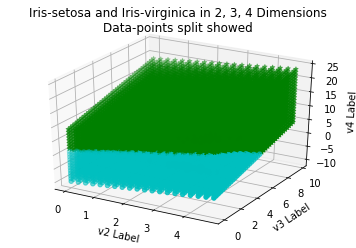

In [7]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
IRIS_FILENAME = 'iris-dataset.csv'
%matplotlib inline

iris_dat = pd.read_csv(IRIS_FILENAME, names=['v1', 'v2', 'v3', 'v4', 'label'], index_col=False)
types = iris_dat['label'].unique()
iris_by_types = {t: iris_dat.loc[iris_dat['label'] == t] for t in types}
iris_d234 = iris_dat.loc[:, ['v2', 'v3', 'v4', 'label']]
iris_d234_bytypes = {t: iris_d234.loc[iris_d234['label'] == t] for t in iris_d234['label'].unique()}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dat = iris_d234_bytypes['Iris-setosa']
ax.scatter(dat['v2'], dat['v3'], dat['v4'], label=dat['label'].unique()[0], c='r', marker='o')
dat = iris_d234_bytypes['Iris-virginica']
ax.scatter(dat['v2'], dat['v3'], dat['v4'], label=dat['label'].unique()[0], c='b', marker='*')

dat = iris_d234_bytypes['Iris-setosa']
dat = dat.append(iris_d234_bytypes['Iris-virginica'], ignore_index=True)
X = dat.loc[:, ['v2', 'v3', 'v4']]
Y = pd.DataFrame(dat['label'])

clf = LinearSVC(random_state=0)
clf.fit(X, np.array(Y.loc[:, 'label'].T))

def expand(P):
    v0 = [v[0] for v in P]
    v1 = [v[1] for v in P]
    v2 = [v[2] for v in P]
    return v0, v1, v2

for b in range(-10, 10):
    V2 = np.arange(0, 5, 0.25)
    V3 = np.arange(0, 10, 0.25)
    V2, V3 = np.meshgrid(V2, V3)
    V4 = V2 + V3 + b
    P = list(zip(V2.flatten(), V3.flatten(), V4.flatten()))
    pred = clf.predict(P)
    s_samples = [P[i] for i in range(len(pred)) if pred[i] == 'Iris-setosa']
    v_samples = [P[i] for i in range(len(pred)) if pred[i] == 'Iris-virginica']
    ax.scatter(*expand(s_samples), label='negative', c='c', marker='o')
    ax.scatter(*expand(v_samples), label='positive', c='g', marker='*')

ax.set_title('Iris-setosa and Iris-virginica in 2, 3, 4 Dimensions' '\n'
             'Data-points split showed')
ax.set_xlabel('v2 Label')
ax.set_ylabel('v3 Label')
ax.set_zlabel('v4 Label')

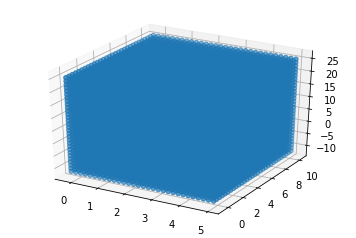

In [8]:
xlim, ylim, zlim = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()
X = np.linspace(xlim[0], xlim[1], 30)
Y = np.linspace(ylim[0], ylim[1], 30)
Z = np.linspace(zlim[0], zlim[1], 30)
X, Y, Z = np.meshgrid(X, Y, Z)
xyz = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

def expand(P):
    v0 = [v[0] for v in P]
    v1 = [v[1] for v in P]
    v2 = [v[2] for v in P]
    return v0, v1, v2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*expand(xyz))

In [9]:
clf.predict(xyz)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', ..., 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [10]:
clf.decision_function(xyz)

array([-3.55952001, -3.21438288, -2.86924576, ...,  8.08726746,
        8.43240458,  8.77754171])

In [11]:
clf.coef_

array([[-0.49924653,  0.46029353,  0.27161402]])

In [15]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_iris_d234_sv(ax)

def draw_plane(coef, ax):
    """
    v1x + v2y + v3z = 0
    z = 1/v3 (-v1x  -v2y)
      = 1/v3 [(-v1 -v2) (x y)T]
    """
    xlim, ylim, zlim = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()
    X = np.linspace(xlim[0], xlim[1], 30)
    Y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(X, Y)
    Xr, Yr = X.ravel(), Y.ravel()
    XY = np.vstack([Xr, Yr]).T
    XY = np.array([np.matrix(m).T for m in XY])
    
    [v1, v2, v3] = list(coef[0])
    A = np.matrix([v1, v2])
    Z = 1/v3*np.array([A*XYi for XYi in XY])
    Z = Z.reshape(X.shape)
    
    ax.plot_surface(X, Y, Z, alpha=0.4)

draw_plane(clf.coef_, ax)

![output](svm-iris3d.svg)